In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

In [2]:
# Loading the train datasets
train_datax=pd.read_csv('/home/ubuntu/Desktop/DMA Project/x_train.csv')
train_datax.drop('Index',axis=1,inplace=True)
train_datax.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,1351.0,4,2012.0,0,2,65440
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,V,NOT,based,2,1972.0,2,1980.0,0,0,14341
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,1630.0,4,NaN,0,0,75109
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,V,NOT,based,2,532.0,3,NaN,0,0,92004
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,IDENTICAL,V,based,2,1050.0,2,1972.0,0,4,59340


In [3]:
train_datax['ft_5_categ'].replace('N','NOT',inplace=True)
train_datax['ft_6_categ'].replace('N','NOT',inplace=True)
train_datax['ft_8_categ'].replace('N','NOT',inplace=True)
train_datax['ft_10_categ'].replace('N','NOT',inplace=True)
train_datax['ft_11_categ'].replace('N','NOT',inplace=True)
train_datax['ft_12_categ'].replace('N','NOT',inplace=True)
train_datax['ft_13_categ'].replace('N','NOT',inplace=True)
train_datax['ft_14_categ'].replace('N','NOT',inplace=True)
train_datax['ft_17_categ'].replace('N','NOT',inplace=True)

In [4]:
train_datay=pd.read_csv('/home/ubuntu/Desktop/DMA Project/y_train.csv')
train_datay.drop('Index',axis=1,inplace=True)
train_datay.head()

,login,TARGET
0,18702,0
1,3877,1
2,4942,0
3,13428,0
4,17137,0


In [5]:
train_data=pd.merge(train_datax,train_datay,on='login',how='outer')
train_data.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0


In [6]:
# Loading the test dataset
test_data=pd.read_csv('/home/ubuntu/Desktop/DMA Project/x_test.csv')
test_data.drop('Index',axis=1,inplace=True)
test_data.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,16872,2012,1.000000,1,V,NOT,1,O,1,O,...,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4,78383
1,16852,2012,1.000000,1,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6,78242
2,598,2014,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,525.0,4,1960.0,0,0,75120
3,4516,2013,0.161644,0,NOT,V,V,V,V,V,...,V,NOT,based,2,443.0,2,1980.0,0,0,11901
4,7939,2013,1.000000,0,NOT,V,V,V,V,V,...,V,NOT,based,2,1070.0,1,NaN,0,0,42330


In [7]:
# Size of dataset
print("Total size of train data:",train_data.shape[0])
print("Total size of test data:",test_data.shape[0])
print("Total size of dataset:",train_data.shape[0]+test_data.shape[0])

Total size of train data: 10229
Total size of test data: 3412
Total size of dataset: 13641


In [8]:
# Percentage of missing data
nan_data=(train_data.isnull().sum()/train_data.shape[0])*100
nan_data

login           0.000000
ft_2_categ      0.000000
EXPO            0.000000
ft_4_categ      0.000000
ft_5_categ      0.000000
ft_6_categ      0.000000
ft_7_categ      0.000000
ft_8_categ      0.000000
ft_9_categ      0.000000
ft_10_categ     0.000000
ft_11_categ     0.000000
ft_12_categ     0.000000
ft_13_categ     0.000000
ft_14_categ     0.000000
ft_15_categ     0.000000
ft_16_categ     0.000000
ft_17_categ     0.000000
ft_18_categ     0.000000
ft_19_categ     0.000000
superficief     1.163359
ft_21_categ     0.000000
ft_22_categ    12.083293
ft_23_categ     0.000000
ft_24_categ     0.000000
Insee           1.124255
TARGET          0.000000
dtype: float64

In [9]:
nan_data[nan_data>0]

superficief     1.163359
ft_22_categ    12.083293
Insee           1.124255
dtype: float64

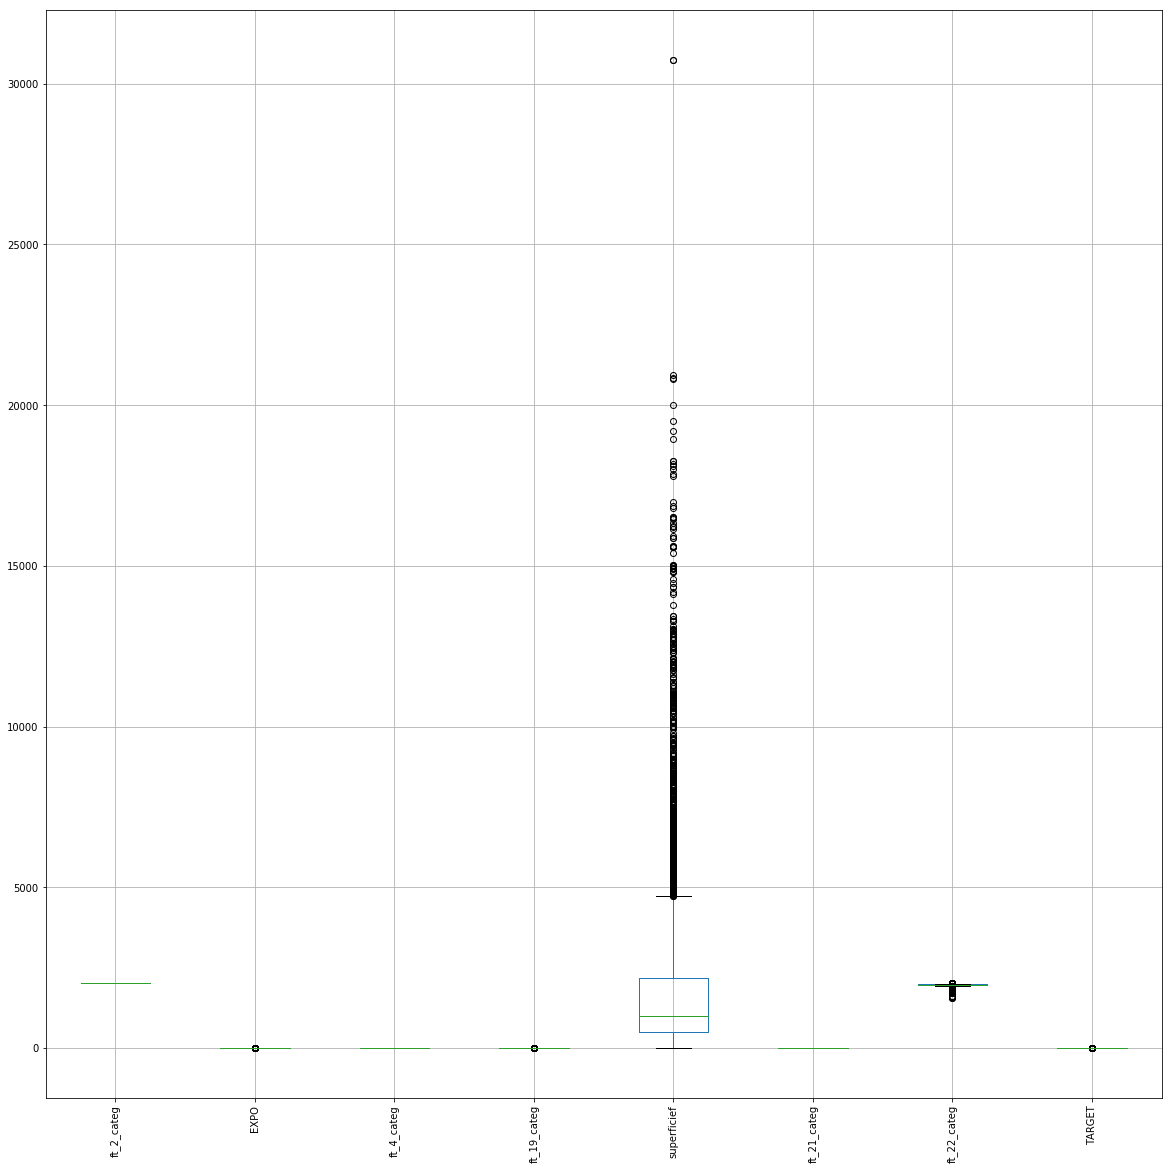

In [10]:
f, ax = plt.subplots(figsize=(20, 20))
train_data.boxplot(['ft_2_categ', 'EXPO', 'ft_4_categ','ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ','TARGET'],rot=90)
plt.show()

In [11]:
test_nan=(test_data.isnull().sum()/test_data.shape[0])*100
test_nan[['superficief','ft_22_categ','Insee']]

superficief     1.230950
ft_22_categ    11.781946
Insee           1.143025
dtype: float64

In [12]:
## superficief
train_data['superficief'].describe()

count    10110.000000
mean      1818.152918
std       2272.111284
min          1.000000
25%        500.000000
50%       1002.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64

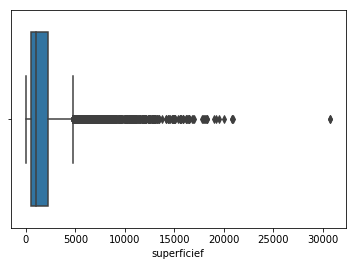

In [13]:
sns.boxplot(x=train_data['superficief'])

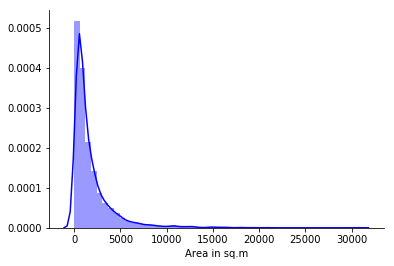

In [14]:
sns.distplot(train_data.superficief.dropna(),color='blue')
plt.xlabel('Area in sq.m')
sns.despine()

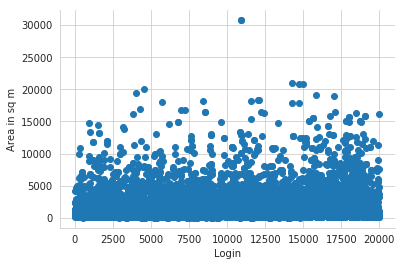

In [15]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['superficief']
plt.xlabel('Login')
plt.ylabel('Area in sq m')
plt.scatter(x,y)
sns.despine()

In [16]:
train_data[train_data.superficief>100]['superficief'].describe()

count    10021.000000
mean      1833.829358
std       2276.052092
min        104.000000
25%        518.000000
50%       1022.000000
75%       2200.000000
max      30745.000000
Name: superficief, dtype: float64

In [17]:
train_data[train_data.superficief<15000]['superficief'].describe()

count    10068.000000
mean      1752.146206
std       2021.729641
min          1.000000
25%        500.000000
50%       1000.000000
75%       2161.500000
max      14950.000000
Name: superficief, dtype: float64

In [18]:
train_data.loc[train_data.superficief>15000]=np.nan
train_data.loc[train_data.superficief<100]=np.nan
train_data.superficief.describe()

count    10005.000000
mean      1768.924138
std       2040.424244
min        100.000000
25%        510.000000
50%       1010.000000
75%       2184.000000
max      15000.000000
Name: superficief, dtype: float64

In [19]:
train_data.ft_22_categ.describe()

count    8910.000000
mean     1964.968350
std        33.640982
min      1545.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

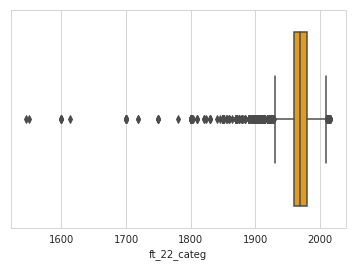

In [20]:
sns.boxplot(x=train_data['ft_22_categ'],color='orange')

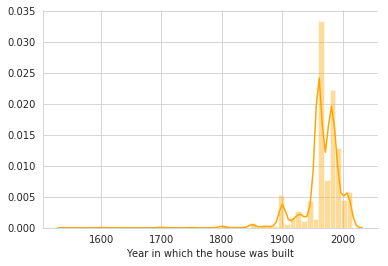

In [21]:
sns.distplot(train_data.ft_22_categ.dropna(),color='orange')
plt.xlabel('Year in which the house was built')
sns.despine()

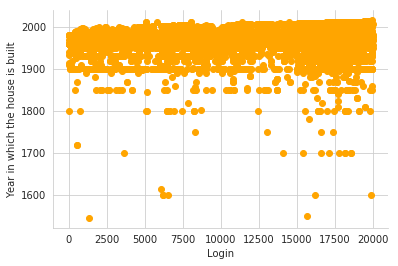

In [22]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_22_categ']
plt.xlabel('Login')
plt.ylabel('Year in which the house is built')
plt.scatter(x,y,color='orange')
sns.despine()

In [23]:
train_data[train_data.ft_22_categ>1850]['ft_22_categ'].describe()

count    8781.000000
mean     1967.354629
std        26.096286
min      1854.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [24]:
train_data[train_data.ft_22_categ<2012]['ft_22_categ'].describe()

count    8812.000000
mean     1964.438153
std        33.447434
min      1545.000000
25%      1960.000000
50%      1967.000000
75%      1980.000000
max      2011.000000
Name: ft_22_categ, dtype: float64

In [25]:
train_data.loc[train_data.ft_22_categ>2012]=np.nan
train_data.loc[train_data.ft_22_categ<1850]=np.nan
train_data.ft_22_categ.describe()

count    8808.000000
mean     1966.344005
std        27.681844
min      1850.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2012.000000
Name: ft_22_categ, dtype: float64

In [26]:
train_data.Insee.describe()

count     9915
unique    1489
top       6088
freq       235
Name: Insee, dtype: object

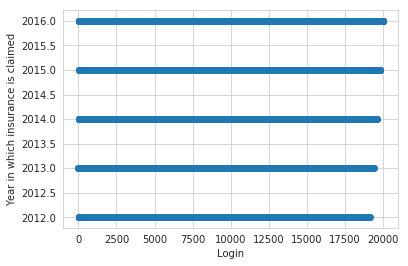

In [27]:
# Data Visualization
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_2_categ']
plt.xlabel('Login')
plt.ylabel('Year in which insurance is claimed')
plt.scatter(x,y)

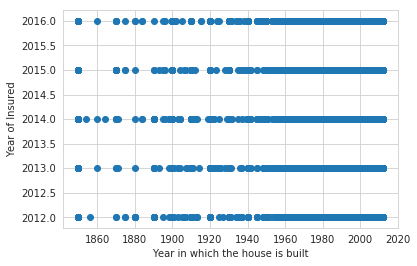

In [28]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
y=train_data['ft_2_categ']
x=train_data['ft_22_categ']
plt.xlabel('Year in which the house is built')
plt.ylabel('Year of Insured')
plt.scatter(x,y)


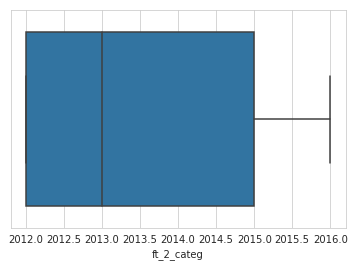

In [29]:
sns.boxplot(x=train_data['ft_2_categ'])

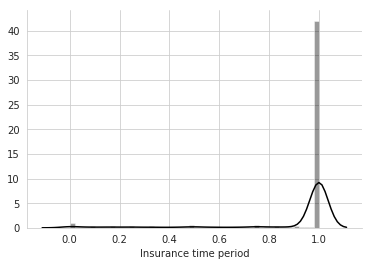

In [30]:
sns.distplot(train_data.EXPO.dropna(),color='black')
plt.xlabel('Insurance time period')
sns.despine()

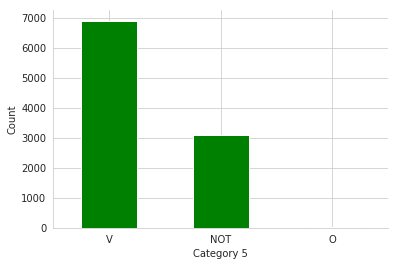

In [31]:
train_data.ft_5_categ.value_counts(dropna=True).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 5')
plt.ylabel('Count')
sns.despine()

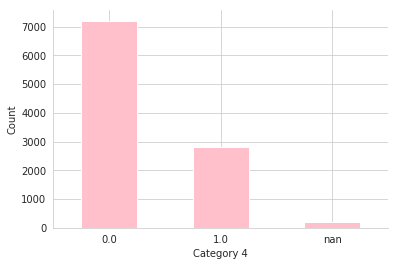

In [32]:
train_data.ft_4_categ.value_counts(dropna=False).plot(kind='bar',color='pink',rot=0)
plt.xlabel('Category 4')
plt.ylabel('Count')
sns.despine()

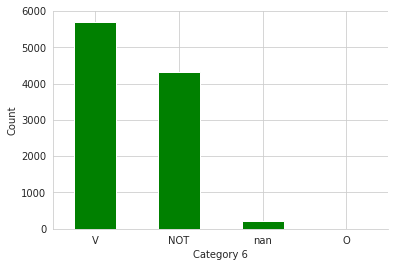

In [33]:
train_data.ft_6_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 6')
plt.ylabel('Count')
sns.despine()

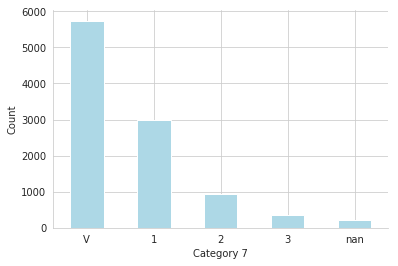

In [34]:
train_data.ft_7_categ.value_counts(dropna=False).plot(kind='bar',color='lightblue',rot=0)
plt.xlabel('Category 7')
plt.ylabel('Count')
sns.despine()

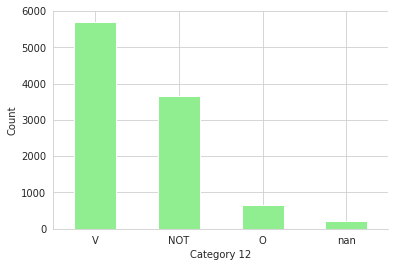

In [35]:
train_data.ft_12_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 12')
plt.ylabel('Count')
sns.despine()


In [36]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
login,10022.0,9914.408501,5602.210746,0.0,5150.25,9780.5,14844.75,19995.0
ft_2_categ,10022.0,2013.637797,1.379971,2012.0,2012.00,2013.0,2015.00,2016.0
EXPO,10022.0,0.914973,0.231599,0.0,1.00,1.0,1.00,1.0
ft_4_categ,10022.0,0.281181,0.449598,0.0,0.00,0.0,1.00,1.0
ft_19_categ,10022.0,1.939932,0.237624,1.0,2.00,2.0,2.00,2.0
superficief,9911.0,1774.125719,2046.238631,100.0,510.00,1013.0,2188.00,15000.0
ft_21_categ,10022.0,2.238775,0.961675,1.0,2.00,2.0,3.00,4.0
ft_22_categ,8808.0,1966.344005,27.681844,1850.0,1960.00,1970.0,1980.00,2012.0
TARGET,10022.0,0.227500,0.419239,0.0,0.00,0.0,0.00,1.0


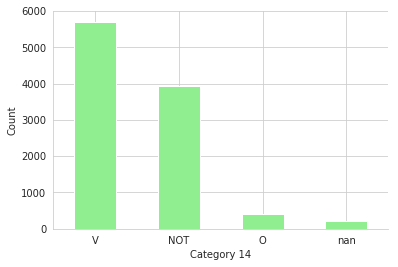

In [37]:
train_data.ft_14_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 14')
plt.ylabel('Count')
sns.despine()

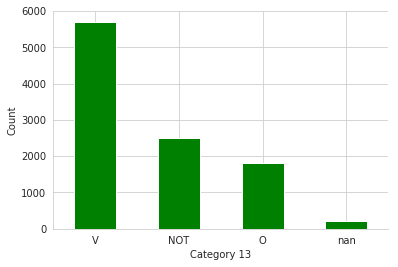

In [38]:
train_data.ft_13_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 13')
plt.ylabel('Count')
sns.despine()


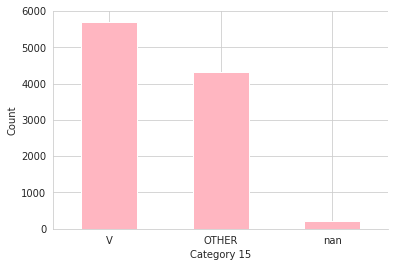

In [39]:
train_data.ft_15_categ.replace('AUTRE','OTHER',inplace=True)
train_data.ft_15_categ
train_data.ft_15_categ.value_counts(dropna=False).plot(kind='bar',color='lightpink',rot=0)
plt.xlabel('Category 15')
plt.ylabel('Count')
sns.despine()
plt.show()

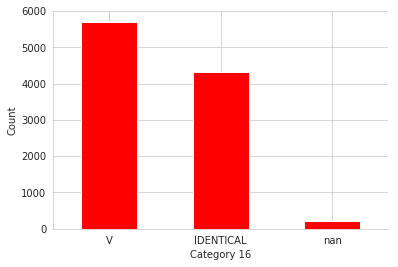

In [40]:
train_data.ft_16_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_16_categ.value_counts(dropna=False).plot(kind='bar',color='red',rot=0)
plt.xlabel('Category 16')
plt.ylabel('Count')
sns.despine()

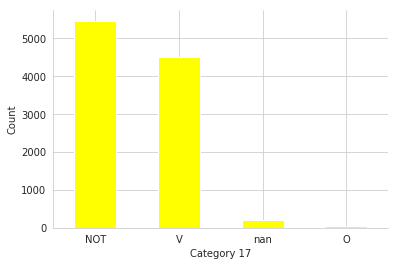

In [41]:
train_data.ft_17_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_17_categ.value_counts(dropna=False).plot(kind='bar',color='yellow',rot=0)
plt.xlabel('Category 17')
plt.ylabel('Count')
sns.despine()

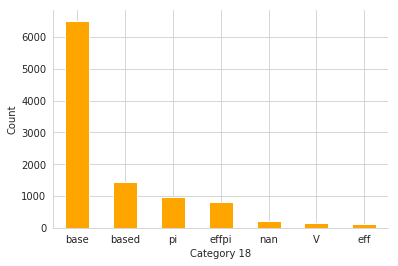

In [42]:
train_data.ft_18_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_18_categ.value_counts(dropna=False).plot(kind='bar',color='orange',rot=0)
plt.xlabel('Category 18')
plt.ylabel('Count')
sns.despine()

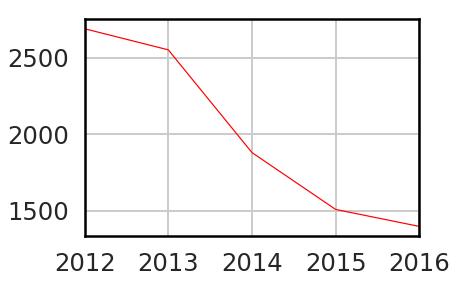

In [43]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
train_data.ft_2_categ.value_counts().plot(kind='line', linewidth=1.2, color='red')


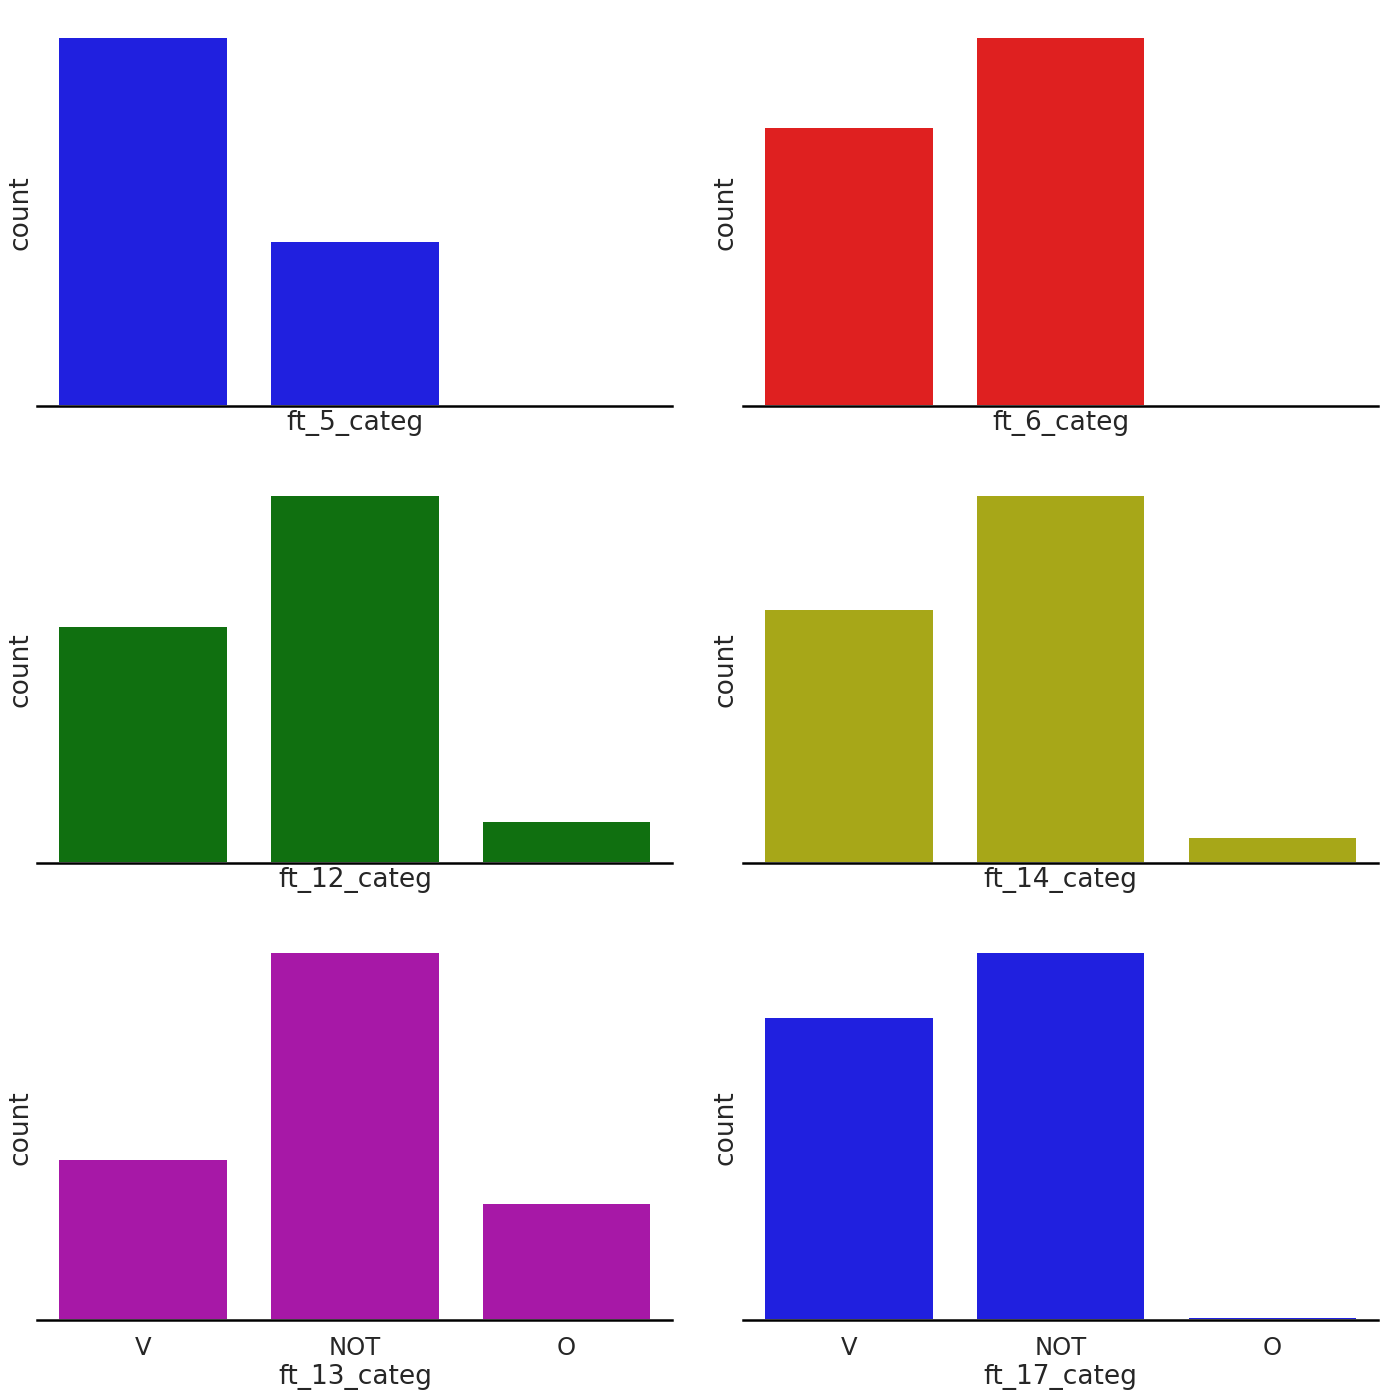

In [44]:
f,a=plt.subplots(3,2,figsize=(20,20),sharex=True)
sns.despine(left=True)
sns.countplot(x="ft_5_categ",data=train_data,color="b",ax=a[0,0])
sns.countplot(x="ft_6_categ",data=train_data,color="r",ax=a[0,1])
sns.countplot(x="ft_12_categ",data=train_data,color="g",ax=a[1,0])
sns.countplot(x="ft_14_categ",data=train_data,color="y",ax=a[1,1])
sns.countplot(x="ft_13_categ",data=train_data,color="m",ax=a[2,0])
sns.countplot(x="ft_17_categ",data=train_data,color="b",ax=a[2,1])
plt.setp(a,yticks=[])
plt.tight_layout()

In [45]:
# Removing attribute login as it does not support in the prediction
train_data.drop('login',axis=1,inplace=True)
test_data.drop('login',axis=1,inplace=True)
train_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,2014.0,1.000000,0.0,V,NOT,1,O,1,O,NOT,...,V,based,2.0,1351.0,4.0,2012.0,0,2,65440,0.0
1,2014.0,1.000000,0.0,V,V,V,V,V,V,V,...,NOT,based,2.0,1972.0,2.0,1980.0,0,0,14341,1.0
2,2013.0,1.000000,1.0,V,V,V,V,V,V,V,...,NOT,based,2.0,1630.0,4.0,NaN,0,0,75109,0.0
3,2013.0,0.246575,0.0,NOT,V,V,V,V,V,V,...,NOT,based,2.0,532.0,3.0,NaN,0,0,92004,0.0
4,2015.0,1.000000,0.0,V,NOT,2,O,1,O,NOT,...,V,based,2.0,1050.0,2.0,1972.0,0,4,59340,0.0


In [46]:
test_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4,78383
1,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6,78242
2,2014,1.000000,1,V,V,V,V,V,V,V,...,V,NOT,based,2,525.0,4,1960.0,0,0,75120
3,2013,0.161644,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,443.0,2,1980.0,0,0,11901
4,2013,1.000000,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,1070.0,1,NaN,0,0,42330


In [47]:
nan_data1=train_data.isnull().sum()
nan_data1

ft_2_categ      207
EXPO            207
ft_4_categ      207
ft_5_categ      207
ft_6_categ      207
ft_7_categ      207
ft_8_categ      207
ft_9_categ      207
ft_10_categ     207
ft_11_categ     207
ft_12_categ     207
ft_13_categ     207
ft_14_categ     207
ft_15_categ     207
ft_16_categ     207
ft_17_categ     207
ft_18_categ     207
ft_19_categ     207
superficief     318
ft_21_categ     207
ft_22_categ    1421
ft_23_categ     207
ft_24_categ     207
Insee           314
TARGET          207
dtype: int64

In [48]:
train_data['superficief']=train_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [49]:
train_data['Insee']=train_data.Insee.fillna(method='bfill').fillna(0)

In [50]:
train_data['ft_22_categ']=train_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [51]:
train_data['ft_23_categ']=train_data.ft_23_categ.replace('V',np.nan)

In [52]:
train_data['ft_23_categ']=train_data['ft_23_categ'].astype('float')

In [53]:
train_data['ft_23_categ'].describe()

count    9915.000000
mean        0.067474
std         0.191777
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [54]:
train_data['ft_23_categ']=train_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [55]:
train_data['ft_24_categ']=train_data.ft_24_categ.replace('> = 10',10)
train_data['ft_24_categ']=train_data.ft_24_categ.replace('>=10',10)
train_data['ft_24_categ']=train_data['ft_24_categ'].astype('float')
train_data['ft_24_categ']=train_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [56]:
train_data['ft_7_categ']=train_data.ft_7_categ.replace('V',np.nan)
train_data['ft_7_categ']=train_data['ft_7_categ'].astype('float')
train_data['ft_7_categ']=train_data['ft_7_categ'].interpolate(method='linear',limit_direction='forward')

In [57]:
train_data['ft_9_categ']=train_data.ft_9_categ.replace('V',np.nan)
train_data['ft_9_categ']=train_data['ft_9_categ'].astype('float')
train_data['ft_9_categ']=train_data['ft_9_categ'].interpolate(method='linear',limit_direction='forward')

In [58]:
train_data['ft_2_categ']=train_data['ft_2_categ'].interpolate(method='linear',limit_direction='forward')

In [59]:
train_data['EXPO']=train_data['EXPO'].interpolate(method='linear',limit_direction='forward')

In [60]:
train_data['ft_4_categ']=train_data['ft_4_categ'].interpolate(method='linear',limit_direction='forward')

In [61]:
train_data['ft_5_categ']=train_data['ft_5_categ'].interpolate(method='linear',limit_direction='forward')

In [62]:
train_data['ft_6_categ']=train_data['ft_6_categ'].interpolate(method='linear',limit_direction='forward')

In [63]:
train_data['ft_8_categ']=train_data['ft_8_categ'].interpolate(method='linear',limit_direction='forward')

In [64]:
train_data['ft_10_categ']=train_data['ft_10_categ'].interpolate(method='linear',limit_direction='forward')

In [65]:
train_data['ft_11_categ']=train_data['ft_11_categ'].interpolate(method='linear',limit_direction='forward')

In [66]:
train_data['ft_12_categ']=train_data['ft_12_categ'].interpolate(method='linear',limit_direction='forward')

In [67]:
train_data['ft_13_categ']=train_data['ft_13_categ'].interpolate(method='linear',limit_direction='forward')

In [68]:
train_data['ft_14_categ']=train_data['ft_14_categ'].interpolate(method='linear',limit_direction='forward')

In [69]:
train_data['ft_15_categ']=train_data['ft_15_categ'].interpolate(method='linear',limit_direction='forward')

In [70]:
train_data['ft_16_categ']=train_data['ft_16_categ'].interpolate(method='linear',limit_direction='forward')

In [71]:
train_data['ft_17_categ']=train_data['ft_17_categ'].interpolate(method='linear',limit_direction='forward')

In [72]:
train_data['ft_18_categ']=train_data['ft_18_categ'].interpolate(method='linear',limit_direction='forward')

In [73]:
train_data['ft_19_categ']=train_data['ft_19_categ'].interpolate(method='linear',limit_direction='forward')

In [74]:
train_data['ft_21_categ']=train_data['ft_21_categ'].interpolate(method='linear',limit_direction='forward')

In [75]:
train_data['TARGET']=train_data['TARGET'].interpolate(method='linear',limit_direction='forward')

In [76]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.636524,1.372438,2012.0,2012.0,2013.0,2015.000000,2016.0
EXPO,10229.0,0.915155,0.230248,0.0,1.0,1.0,1.000000,1.0
ft_4_categ,10229.0,0.280428,0.447198,0.0,0.0,0.0,1.000000,1.0
ft_7_categ,10229.0,1.379069,0.543525,1.0,1.0,1.0,1.714286,3.0
ft_9_categ,10229.0,1.001369,0.037410,1.0,1.0,1.0,1.000000,3.0
ft_19_categ,10229.0,1.939828,0.236644,1.0,2.0,2.0,2.000000,2.0
superficief,10229.0,1775.074983,2034.474213,100.0,520.0,1025.0,2190.000000,15000.0
ft_21_categ,10229.0,2.238342,0.956217,1.0,2.0,2.0,3.000000,4.0
ft_22_categ,10229.0,1966.399355,26.809675,1850.0,1960.0,1970.0,1980.000000,2012.0
ft_23_categ,10229.0,0.067920,0.190618,0.0,0.0,0.0,0.000000,2.0


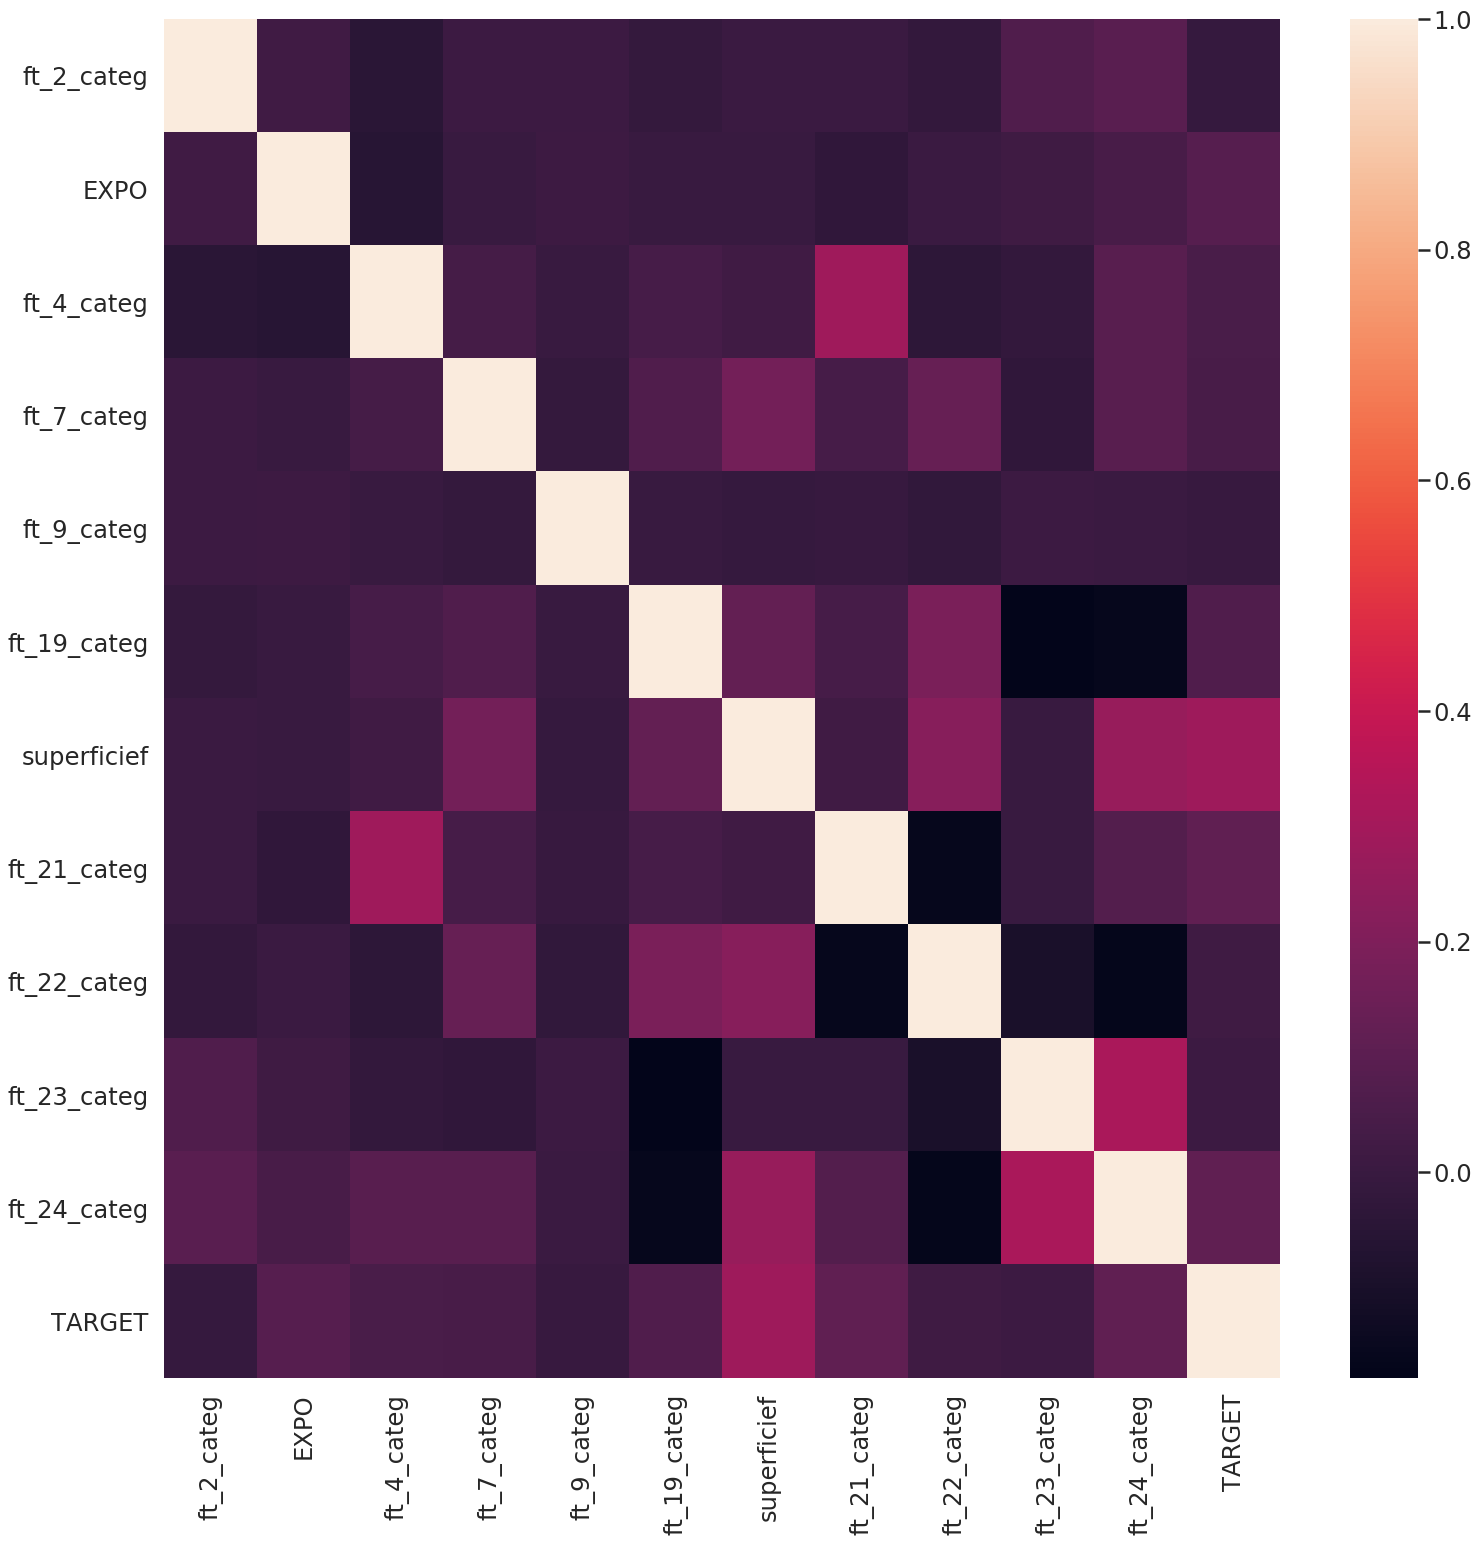

In [77]:
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [79]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ft_2_categ,EXPO,ft_4_categ,ft_7_categ,ft_9_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,TARGET
ft_2_categ,1,0.021,-0.048,0.0082,0.0097,-0.015,0.0025,0.003,-0.018,0.067,0.095,-0.011
EXPO,0.021,1,-0.054,-0.0031,0.011,0.0007,-0.0015,-0.03,0.0027,0.017,0.046,0.088
ft_4_categ,-0.048,-0.054,1,0.038,-0.0025,0.041,0.022,0.29,-0.038,-0.019,0.092,0.048
ft_7_categ,0.0082,-0.0031,0.038,1,-0.013,0.068,0.17,0.038,0.13,-0.027,0.091,0.045
ft_9_categ,0.0097,0.011,-0.0025,-0.013,1,-0.0017,-0.009,-0.0073,-0.026,0.0075,0.0021,-0.0064
ft_19_categ,-0.015,0.0007,0.041,0.068,-0.0017,1,0.12,0.04,0.19,-0.18,-0.16,0.068
superficief,0.0025,-0.0015,0.022,0.17,-0.009,0.12,1,0.02,0.22,-0.0021,0.26,0.28
ft_21_categ,0.003,-0.03,0.29,0.038,-0.0073,0.04,0.02,1,-0.16,-0.0027,0.076,0.11
ft_22_categ,-0.018,0.0027,-0.038,0.13,-0.026,0.19,0.22,-0.16,1,-0.096,-0.17,0.017
ft_23_categ,0.067,0.017,-0.019,-0.027,0.0075,-0.18,-0.0021,-0.0027,-0.096,1,0.31,0.007


From the heat maps and correlation matrix it is visible that ft_19_categ is negatively correlated with ft_23_categ
and ft_24_categ and ft_22_categ is negatively correlated with ft_24_categ and ft_21_categ

In [80]:
# From the heat maps and correlation matrix it is visible that ft_19_categ is negatively correlated with ft_23_categ
#and ft_24_categ
train_data.drop('ft_19_categ',axis=1,inplace=True)
train_data.drop('ft_24_categ',axis=1,inplace=True)
train_data.drop('ft_21_categ',axis=1,inplace=True)

In [81]:
target=train_data['TARGET']
train_data.drop('TARGET',axis=1,inplace=True)

In [82]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_8_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ']

for column in columns_to_convert:
    train_data= convert_to_binary(df=train_data, column_to_convert=column)
    train_data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...complete")

One Hot Encoding categorical data...
One Hot Encoding categorical data...complete


In [83]:
train_data['TARGET']=target
train_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_7_categ,ft_9_categ,superficief,ft_22_categ,ft_23_categ,Insee,ft_5__v,...,ft_17_nan,ft_17_o,ft_18_based,ft_18_effpi,ft_18_v,ft_18_pi,ft_18_eff,ft_18_nan,ft_18_base,TARGET
0,2014.0,1.000000,0.0,1.00,1.0,1351.0,2012.000000,0.0,65440,1,...,0,0,1,0,0,0,0,0,0,0.0
1,2014.0,1.000000,0.0,1.25,1.0,1972.0,1980.000000,0.0,14341,1,...,0,0,1,0,0,0,0,0,0,1.0
2,2013.0,1.000000,1.0,1.50,1.0,1630.0,1977.333333,0.0,75109,1,...,0,0,1,0,0,0,0,0,0,0.0
3,2013.0,0.246575,0.0,1.75,1.0,532.0,1974.666667,0.0,92004,0,...,0,0,1,0,0,0,0,0,0,0.0
4,2015.0,1.000000,0.0,2.00,1.0,1050.0,1972.000000,0.0,59340,1,...,0,0,1,0,0,0,0,0,0,0.0


In [84]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.636524,1.372438,2012.0,2012.0,2013.0,2015.000000,2016.0
EXPO,10229.0,0.915155,0.230248,0.0,1.0,1.0,1.000000,1.0
ft_4_categ,10229.0,0.280428,0.447198,0.0,0.0,0.0,1.000000,1.0
ft_7_categ,10229.0,1.379069,0.543525,1.0,1.0,1.0,1.714286,3.0
ft_9_categ,10229.0,1.001369,0.037410,1.0,1.0,1.0,1.000000,3.0
superficief,10229.0,1775.074983,2034.474213,100.0,520.0,1025.0,2190.000000,15000.0
ft_22_categ,10229.0,1966.399355,26.809675,1850.0,1960.0,1970.0,1980.000000,2012.0
ft_23_categ,10229.0,0.067920,0.190618,0.0,0.0,0.0,0.000000,2.0
ft_5__v,10229.0,0.674748,0.468492,0.0,0.0,1.0,1.000000,1.0
ft_5__not,10229.0,0.301985,0.459141,0.0,0.0,0.0,1.000000,1.0


In [85]:
train_data.ft_2_categ=minmax_scaling(train_data['ft_2_categ'],columns=0)

In [86]:
train_data.EXPO=minmax_scaling(train_data['EXPO'],columns=0)

In [87]:
train_data.ft_4_categ=minmax_scaling(train_data['ft_4_categ'],columns=0)

In [88]:
train_data.ft_7_categ=minmax_scaling(train_data['ft_7_categ'],columns=0)

In [89]:
train_data.ft_9_categ=minmax_scaling(train_data['ft_9_categ'],columns=0)

In [90]:
train_data.superficief=minmax_scaling(train_data['superficief'],columns=0)

In [91]:
train_data.ft_22_categ=minmax_scaling(train_data['ft_22_categ'],columns=0)

In [92]:
train_data.ft_23_categ=minmax_scaling(train_data['ft_23_categ'],columns=0)

In [93]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,0.409131,0.343109,0.0,0.000000,0.250000,0.750000,1.0
EXPO,10229.0,0.915155,0.230248,0.0,1.000000,1.000000,1.000000,1.0
ft_4_categ,10229.0,0.280428,0.447198,0.0,0.000000,0.000000,1.000000,1.0
ft_7_categ,10229.0,0.189535,0.271763,0.0,0.000000,0.000000,0.357143,1.0
ft_9_categ,10229.0,0.000684,0.018705,0.0,0.000000,0.000000,0.000000,1.0
superficief,10229.0,0.112421,0.136542,0.0,0.028188,0.062081,0.140268,1.0
ft_22_categ,10229.0,0.718515,0.165492,0.0,0.679012,0.740741,0.802469,1.0
ft_23_categ,10229.0,0.033960,0.095309,0.0,0.000000,0.000000,0.000000,1.0
ft_5__v,10229.0,0.674748,0.468492,0.0,0.000000,1.000000,1.000000,1.0
ft_5__not,10229.0,0.301985,0.459141,0.0,0.000000,0.000000,1.000000,1.0


In [94]:
train_data.drop('Insee',axis=1,inplace=True)

In [95]:
train_data.drop(['ft_5__nan','ft_6__nan','ft_8__nan','ft_10_nan','ft_11_nan','ft_12_nan','ft_13_nan','ft_14_nan','ft_15_nan','ft_16_nan','ft_17_nan','ft_18_nan'],axis=1,inplace=True)

In [96]:
train_data.shape[1]

46

In [97]:
train_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_7_categ', 'ft_9_categ',
       'superficief', 'ft_22_categ', 'ft_23_categ', 'ft_5__v', 'ft_5__not',
       'ft_5__o', 'ft_6__not', 'ft_6__v', 'ft_6__o', 'ft_8__o', 'ft_8__v',
       'ft_8__not', 'ft_10_o', 'ft_10_v', 'ft_10_not', 'ft_11_not', 'ft_11_v',
       'ft_11_o', 'ft_12_not', 'ft_12_v', 'ft_12_o', 'ft_13_not', 'ft_13_v',
       'ft_13_o', 'ft_14_not', 'ft_14_v', 'ft_14_o', 'ft_15_other', 'ft_15_v',
       'ft_16_identical', 'ft_16_v', 'ft_17_v', 'ft_17_not', 'ft_17_o',
       'ft_18_based', 'ft_18_effpi', 'ft_18_v', 'ft_18_pi', 'ft_18_eff',
       'ft_18_base', 'TARGET'],
      dtype='object')

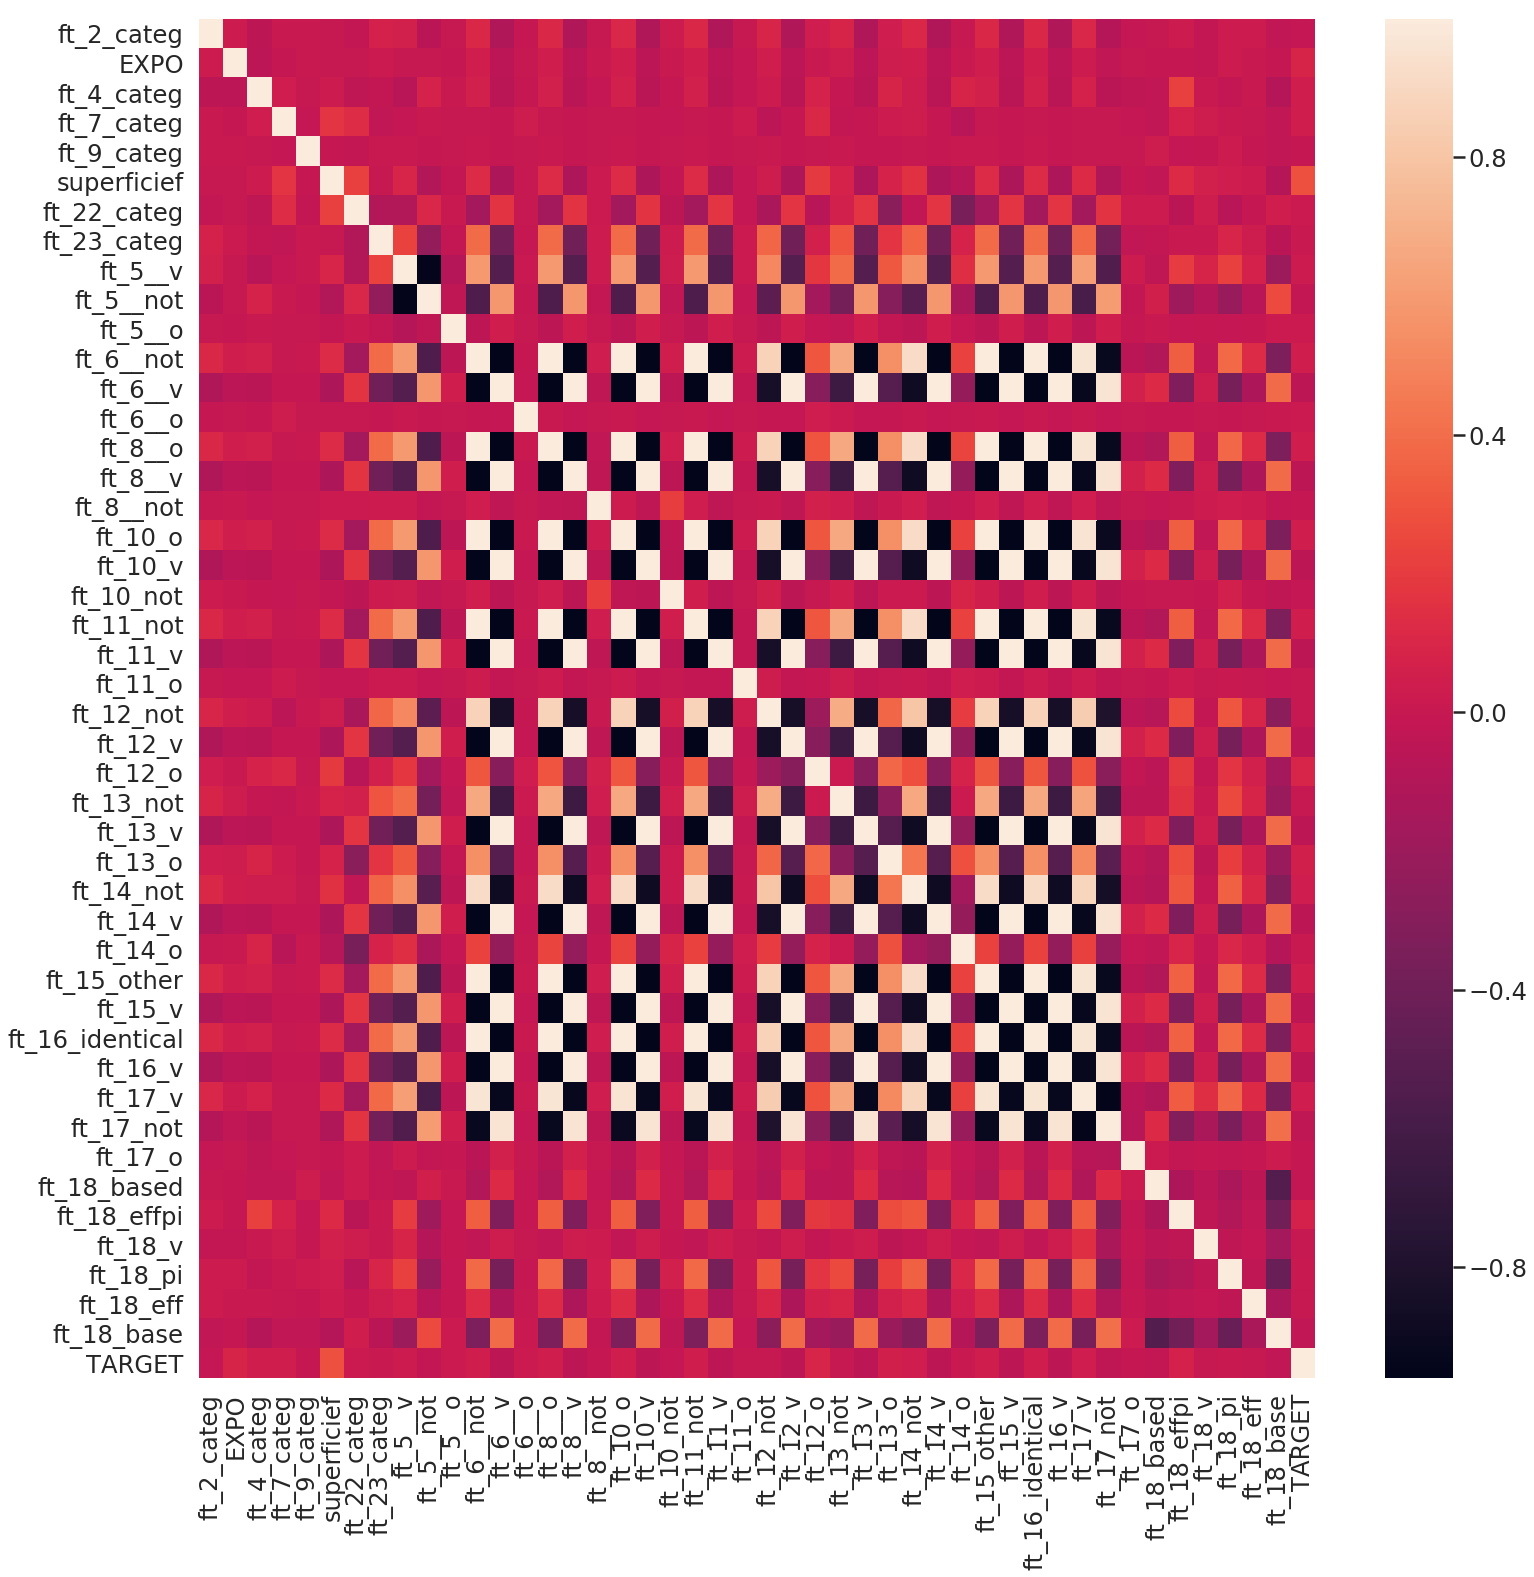

In [98]:
corr = train_data.corr()
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [100]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [101]:
test_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4,78383
1,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6,78242
2,2014,1.000000,1,V,V,V,V,V,V,V,...,V,NOT,based,2,525.0,4,1960.0,0,0,75120
3,2013,0.161644,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,443.0,2,1980.0,0,0,11901
4,2013,1.000000,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,1070.0,1,NaN,0,0,42330


In [102]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_8_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ']

for column in columns_to_convert:
    test_data = convert_to_binary(df=test_data, column_to_convert=column)
    test_data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...complete")

One Hot Encoding categorical data...
One Hot Encoding categorical data...complete


In [103]:
nan_data2=test_data.isnull().sum()
nan_data2

ft_2_categ           0
EXPO                 0
ft_4_categ           0
ft_7_categ           0
ft_9_categ           0
ft_19_categ          0
superficief         42
ft_21_categ          0
ft_22_categ        402
ft_23_categ          0
ft_24_categ          0
Insee               39
ft_5__v              0
ft_5__not            0
ft_5__o              0
ft_6__not            0
ft_6__v              0
ft_6__o              0
ft_8__o              0
ft_8__v              0
ft_8__not            0
ft_10_o              0
ft_10_v              0
ft_10_not            0
ft_11_not            0
ft_11_v              0
ft_11_o              0
ft_12_not            0
ft_12_v              0
ft_12_o              0
ft_13_o              0
ft_13_v              0
ft_13_not            0
ft_14_not            0
ft_14_v              0
ft_14_o              0
ft_15_other          0
ft_15_v              0
ft_16_identical      0
ft_16_v              0
ft_17_v              0
ft_17_not            0
ft_17_o              0
ft_18_effpi

In [104]:
test_data['superficief']=test_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [105]:
test_data['ft_22_categ']=test_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [106]:
test_data['ft_23_categ']=test_data.ft_23_categ.replace('V',np.nan)
test_data['ft_23_categ']=test_data['ft_23_categ'].astype('float')
test_data['ft_23_categ'].describe()

count    3373.000000
mean        0.068574
std         0.185897
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [107]:
test_data['ft_23_categ']=test_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [108]:
test_data.drop('ft_24_categ',axis=1,inplace=True)

In [109]:
test_data['ft_7_categ']=test_data.ft_7_categ.replace('V',np.nan)
test_data['ft_7_categ']=test_data['ft_7_categ'].astype('float')
test_data['ft_7_categ']=test_data['ft_7_categ'].interpolate(method='linear',limit_direction='forward')

In [110]:
test_data['ft_9_categ']=test_data.ft_9_categ.replace('V',np.nan)
test_data['ft_9_categ']=test_data['ft_9_categ'].astype('float')
test_data['ft_9_categ']=test_data['ft_9_categ'].interpolate(method='linear',limit_direction='forward')

In [111]:
test_data.drop('Insee',axis=1,inplace=True)
test_data.drop('ft_19_categ',axis=1,inplace=True)
test_data.drop('ft_21_categ',axis=1,inplace=True)

In [112]:
test_data.ft_2_categ=minmax_scaling(test_data['ft_2_categ'],columns=0)

In [113]:
test_data['EXPO']=minmax_scaling(test_data['EXPO'],columns=0)

In [114]:
test_data.ft_4_categ=minmax_scaling(test_data['ft_4_categ'],columns=0)

In [115]:
test_data['superficief']=minmax_scaling(test_data['superficief'],columns=0)

In [116]:
test_data.ft_22_categ=minmax_scaling(test_data['ft_22_categ'],columns=0)

In [117]:
test_data.ft_7_categ=minmax_scaling(test_data['ft_7_categ'],columns=0)

In [118]:
test_data.ft_9_categ=minmax_scaling(test_data['ft_9_categ'],columns=0)

In [119]:
test_data.ft_23_categ=minmax_scaling(test_data['ft_23_categ'],columns=0)

In [120]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,3412.0,0.402696,0.346992,0.0,0.000000,0.250000,0.750000,1.0
EXPO,3412.0,0.911044,0.236351,0.0,1.000000,1.000000,1.000000,1.0
ft_4_categ,3412.0,0.270223,0.444140,0.0,0.000000,0.000000,1.000000,1.0
ft_7_categ,3412.0,0.174311,0.267292,0.0,0.000000,0.000000,0.333333,1.0
ft_9_categ,3412.0,0.001246,0.025554,0.0,0.000000,0.000000,0.000000,1.0
superficief,3412.0,0.051383,0.063580,0.0,0.014205,0.028641,0.063287,1.0
ft_22_categ,3412.0,0.899981,0.067929,0.0,0.891473,0.909399,0.930233,1.0
ft_23_categ,3412.0,0.034386,0.092699,0.0,0.000000,0.000000,0.000000,1.0
ft_5__v,3412.0,0.672333,0.469432,0.0,0.000000,1.000000,1.000000,1.0
ft_5__not,3412.0,0.324736,0.468345,0.0,0.000000,0.000000,1.000000,1.0


In [121]:
test_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_7_categ', 'ft_9_categ',
       'superficief', 'ft_22_categ', 'ft_23_categ', 'ft_5__v', 'ft_5__not',
       'ft_5__o', 'ft_6__not', 'ft_6__v', 'ft_6__o', 'ft_8__o', 'ft_8__v',
       'ft_8__not', 'ft_10_o', 'ft_10_v', 'ft_10_not', 'ft_11_not', 'ft_11_v',
       'ft_11_o', 'ft_12_not', 'ft_12_v', 'ft_12_o', 'ft_13_o', 'ft_13_v',
       'ft_13_not', 'ft_14_not', 'ft_14_v', 'ft_14_o', 'ft_15_other',
       'ft_15_v', 'ft_16_identical', 'ft_16_v', 'ft_17_v', 'ft_17_not',
       'ft_17_o', 'ft_18_effpi', 'ft_18_based', 'ft_18_eff', 'ft_18_pi',
       'ft_18_v'],
      dtype='object')

In [122]:
test_data.shape[1]

44

In [148]:
arr=train_data.values
X=arr[:,0:45]
Y=train_datay['TARGET']

In [134]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [136]:
train_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_7_categ', 'ft_9_categ',
       'superficief', 'ft_22_categ', 'ft_23_categ', 'ft_5__v', 'ft_5__not',
       'ft_5__o', 'ft_6__not', 'ft_6__v', 'ft_6__o', 'ft_8__o', 'ft_8__v',
       'ft_8__not', 'ft_10_o', 'ft_10_v', 'ft_10_not', 'ft_11_not', 'ft_11_v',
       'ft_11_o', 'ft_12_not', 'ft_12_v', 'ft_12_o', 'ft_13_not', 'ft_13_v',
       'ft_13_o', 'ft_14_not', 'ft_14_v', 'ft_14_o', 'ft_15_other', 'ft_15_v',
       'ft_16_identical', 'ft_16_v', 'ft_17_v', 'ft_17_not', 'ft_17_o',
       'ft_18_based', 'ft_18_effpi', 'ft_18_v', 'ft_18_pi', 'ft_18_eff',
       'ft_18_base', 'TARGET'],
      dtype='object')

In [135]:
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False  True False False False  True  True False False False  True  True
 False  True  True False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False  True False False False False]
Feature Ranking: [18  1  5 35  3  1  1  2 13 14  1  1 31  1  1 24  4  1 28  7 20 12  8  1
 15 11 33 19 17 30 21 10 34 23 32 27 22 29 16 36  1  6 25  9 26]


In [155]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model1 = XGBClassifier()
model1.fit(X, Y)
y_pred = model.predict(test_data)
predictions = [round(value) for value in y_pred]

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44'] ['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_7_categ', 'ft_9_categ', 'superficief', 'ft_22_categ', 'ft_23_categ', 'ft_5__v', 'ft_5__not', 'ft_5__o', 'ft_6__not', 'ft_6__v', 'ft_6__o', 'ft_8__o', 'ft_8__v', 'ft_8__not', 'ft_10_o', 'ft_10_v', 'ft_10_not', 'ft_11_not', 'ft_11_v', 'ft_11_o', 'ft_12_not', 'ft_12_v', 'ft_12_o', 'ft_13_o', 'ft_13_v', 'ft_13_not', 'ft_14_not', 'ft_14_v', 'ft_14_o', 'ft_15_other', 'ft_15_v', 'ft_16_identical', 'ft_16_v', 'ft_17_v', 'ft_17_not', 'ft_17_o', 'ft_18_effpi', 'ft_18_based', 'ft_18_eff', 'ft_18_pi', 'ft_18_v']
expected f0, f34, f44, f28, f10, f35, f27, f7, f23, f26, f22, f41, f15, f42, f13, f3, f38, f20, f43, f5, f12, f16, f9, f21, f25, f37, f17, f4, f40, f19, f2, f29, f24, f6, f39, f18, f36, f14, f31, f33, f8, f32, f11, f1, f30 in input data
training data did not have the following fields: ft_14_v, ft_10_v, ft_14_o, superficief, ft_11_o, ft_9_categ, ft_14_not, ft_22_categ, ft_15_other, EXPO, ft_7_categ, ft_18_eff, ft_17_v, ft_4_categ, ft_8__o, ft_6__not, ft_2_categ, ft_6__v, ft_8__v, ft_10_o, ft_16_identical, ft_11_not, ft_15_v, ft_12_o, ft_18_v, ft_23_categ, ft_13_v, ft_6__o, ft_12_not, ft_12_v, ft_16_v, ft_17_not, ft_5__v, ft_11_v, ft_13_not, ft_8__not, ft_18_effpi, ft_13_o, ft_18_pi, ft_18_based, ft_10_not, ft_5__not, ft_5__o, ft_17_o

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [159]:
X=train_data.iloc[:,:-1]
Y=train_data.iloc[:,-1]

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
5        1.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       1.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       1.0
25       0.5
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
10199    0.0
10200    0.0
10201    0.0
10202    0.0
10203    0.0
10204    0.0
10205    0.0
10206    0.0
10207    0.0
10208    0.0
10209    0.0
10210    0.0
10211    1.0
10212    1.0
10213    0.0
10214    0.0
10215    0.0
10216    0.0
10217    0.0
10218    0.0
10219    0.0
10220    1.0
10221    0.0
10222    0.0
10223    0.0
10224    0.0
10225    0.0
10226    0.0
10227    0.0
10228    1.0
Name: TARGET, Length: 10229, dtype: float64


In [ ]:
params={'objective':'binary:logistic','max_depth':}